In [4]:
!git clone https://github.com/Lolleeee/MIEEG
import os
os.environ['DATASET_FOLDER'] = 'dataset'
os.chdir("MIEEG")
from google.colab import drive
drive.mount('drive/')

fatal: destination path 'MIEEG' already exists and is not an empty directory.
Mounted at drive/


In [5]:
!unzip -q /content/drive/MyDrive/Colab_env/WAY-EEG/WAYEEG_DATASET_DL.zip -d dataset

In [ ]:
!git clone https://github.com/Lolleeee/MIEEG
import os 
os.chdir("MIEEG")


Starting training loop...


Training Batches: 100%|██████████| 66/66 [00:12<00:00,  5.68it/s]

[INFO] Train Loss: 0.7634, MAE: 0.5824


Training Batches: 100%|██████████| 66/66 [00:12<00:00,  5.33it/s]


[INFO] Val Loss: 0.7411, MAE: 0.5763
[INFO] Best model saved at epoch 1 with metric 0.7411


Training Batches: 100%|██████████| 66/66 [00:12<00:00,  5.68it/s]

[INFO] Train Loss: 0.7174, MAE: 0.5601


Training Batches: 100%|██████████| 66/66 [00:12<00:00,  5.15it/s]


[INFO] Val Loss: 0.7154, MAE: 0.5594
[INFO] Best model saved at epoch 2 with metric 0.7154


Training Batches: 100%|██████████| 66/66 [00:13<00:00,  5.51it/s]

[INFO] Train Loss: 0.6971, MAE: 0.5532


Training Batches: 100%|██████████| 66/66 [00:13<00:00,  4.99it/s]


[INFO] Val Loss: 0.6941, MAE: 0.5549
[INFO] Best model saved at epoch 3 with metric 0.6941


Training Batches: 100%|██████████| 66/66 [00:12<00:00,  5.51it/s]

[INFO] Train Loss: 0.6666, MAE: 0.5449


Training Batches: 100%|██████████| 66/66 [00:12<00:00,  5.08it/s]


[INFO] Val Loss: 0.6540, MAE: 0.5453
[INFO] Best model saved at epoch 4 with metric 0.6540


Training Batches: 100%|██████████| 66/66 [00:12<00:00,  5.09it/s]

[INFO] Train Loss: 0.6254, MAE: 0.5310


Training Batches: 100%|██████████| 66/66 [00:12<00:00,  5.21it/s]


[INFO] Val Loss: 0.6204, MAE: 0.5327
[INFO] Best model saved at epoch 5 with metric 0.6204


Epochs: 100%|██████████| 5/5 [01:19<00:00, 15.86s/it]


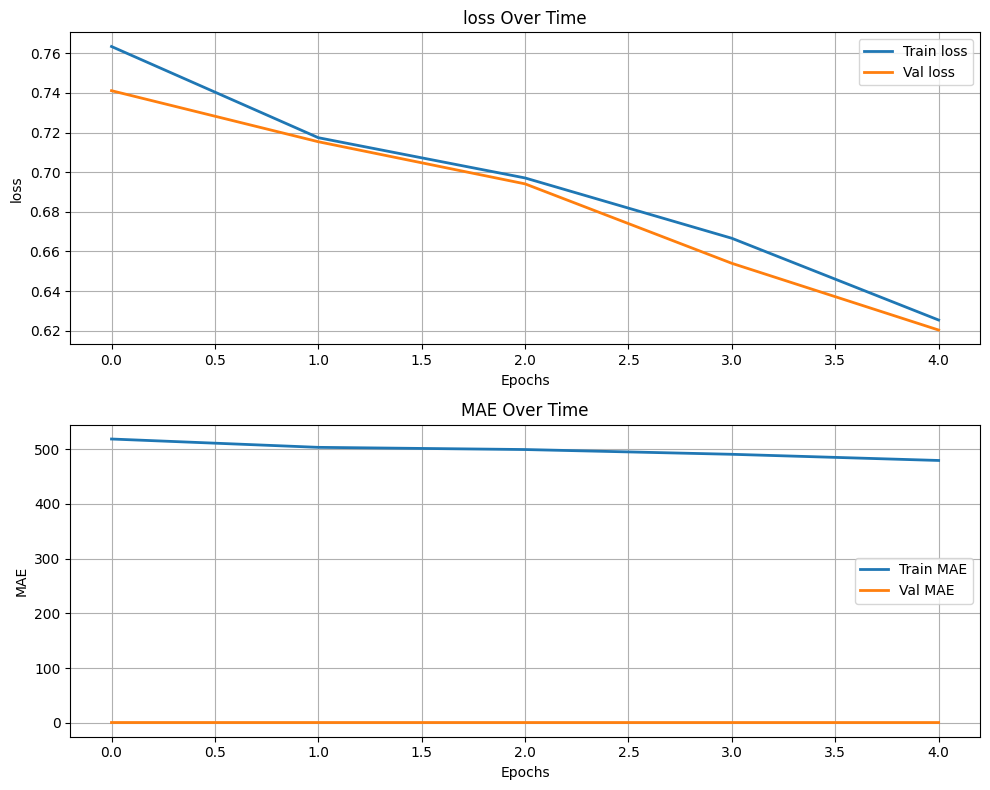

[INFO] Training history plot saved to ./training_history


<Figure size 640x480 with 0 Axes>

In [11]:
from packages.models.autoencoder import Conv3DAutoencoder
from packages.train.training import train_model
from packages.io.input_loader import get_data_loaders
import torch
import os
from packages.data_objects.dataset import Dataset
from dotenv import load_dotenv
model = Conv3DAutoencoder(in_channels=25, embedding_dim=64)
load_dotenv()
dataset_path = "/kaggle/input/wayeeg-autoencoder-subset"
# Dummy training loop
optimizer = torch.optim.AdamW
criterion = torch.nn.MSELoss
mae = torch.nn.L1Loss

config = {
    'batch_size': 32,
    'lr': 1e-3,
    'weight_decay': 1e-4,
    'epochs': 100,
    'EarlyStopping' : {'patience': 15, 'min_delta': 0.1},
    'BackupManager': {'backup_interval': 10, 'backup_path': './model_backups'},
    'ReduceLROnPlateau': {'mode': 'min', 'patience': 8, 'factor': 0.1},
    'history_plot': {'plot_type': 'extended', 'save_path': './training_history'}
}

metrics = {'MAE': mae}

dataset = Dataset(root_folder=dataset_path, unpack_func='dict', file_type='npz')

train_loader, val_loader, _ = get_data_loaders(dataset, sets_size={'train': 0.7, 'val': 0.3, 'test': 0})

print("\nStarting training loop...")
model.train()
train_model(model, train_loader=train_loader, val_loader=val_loader, loss_criterion=criterion, optimizer=optimizer, config=config, metrics=metrics)

In [ ]:
from packages.plotting.reconstruction_plots import plot_reconstruction_scatter
sample = next(iter(val_loader))
inputs = sample.to(torch.device('cpu'))
model.eval()
with torch.no_grad():
    reconstructed = model(inputs)
# Plotting the scatter plot
plot_reconstruction_scatter(original=inputs, reconstructed=reconstructed)